In [47]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время.

In [48]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
# Проверка данныз на анличие пропусков
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [50]:
# Удаление номера строки, есть ID клиента
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [51]:
# Проверка на наличие дубликатов
churn_data[churn_data.duplicated()].sum()

CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

Целевой признак - Exited

RowNumber — номер строки таблицы;\
CustomerId — идентификатор клиента;\
Surname — фамилия клиента;\
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);\
Geography — страна проживания клиента (банк межнациональный);\
Gender — пол клиента;\
Age — возраст клиента;\
Tenure — сколько лет клиент пользуется банком;\
Balance — сколько у клиента денег на счетах в банке;\
NumOfProduct — число услуг банка, которыми воспользовался клиент;\
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);\
IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);\
EstimatedSalary — предполагаемая заработная плата клиента;\
Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [52]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


### Визуализация зависимостей

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Числовые признаки
numeric_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 
                'NumOfProducts', 'EstimatedSalary']
# Категориальные признаки
cat_cols = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Целевая переменная
target = 'Exited'

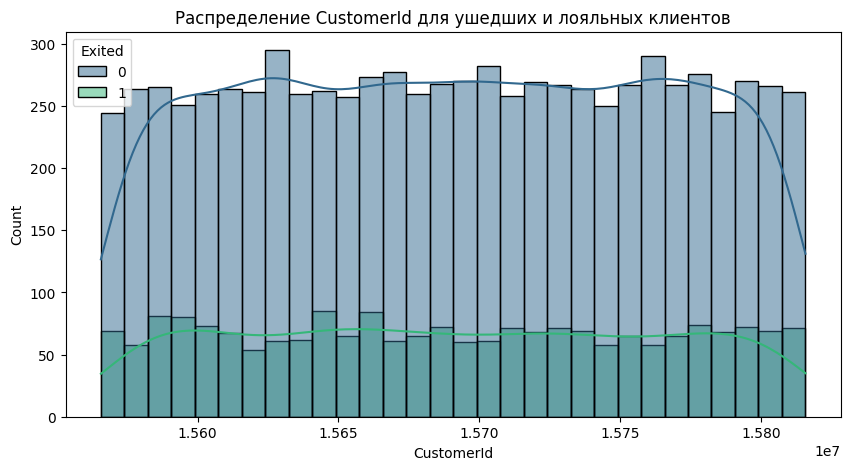

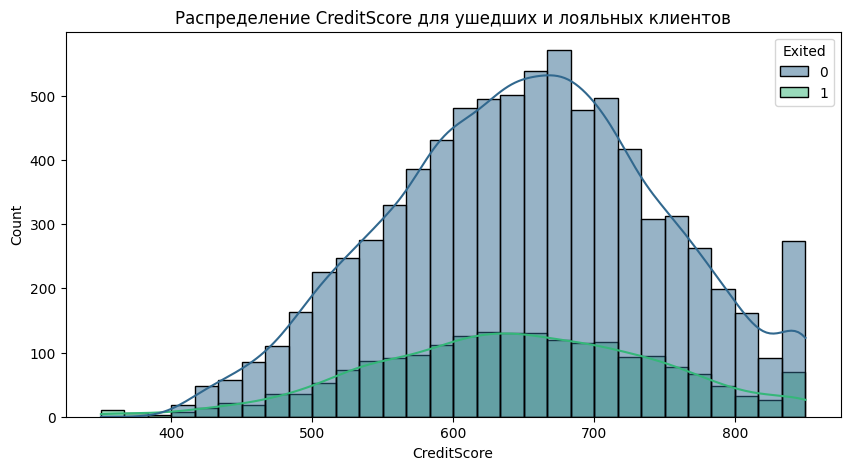

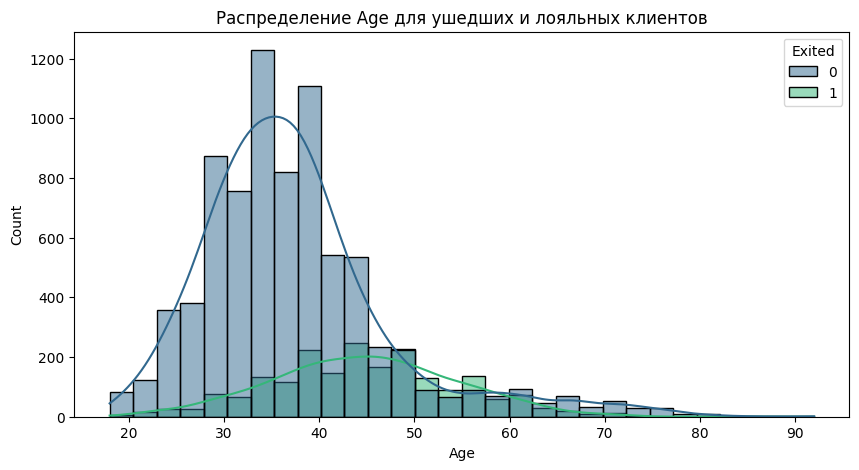

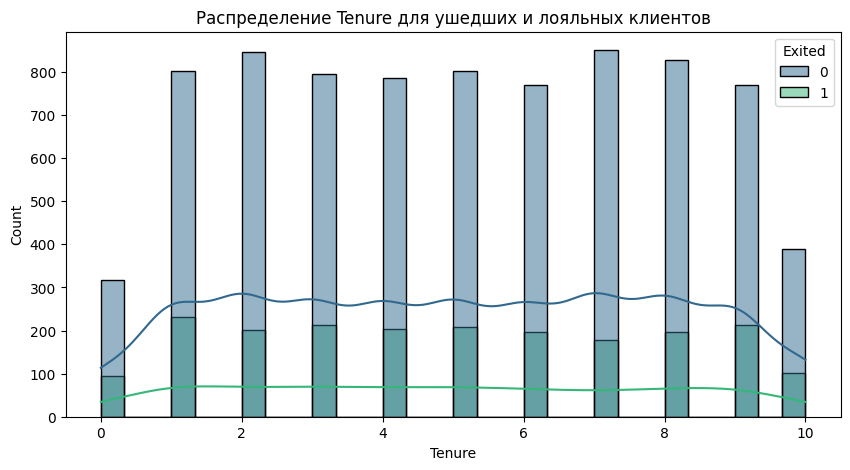

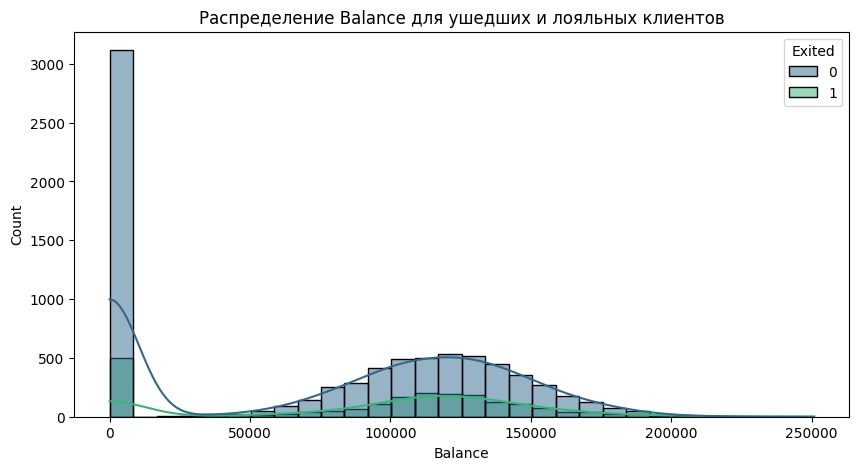

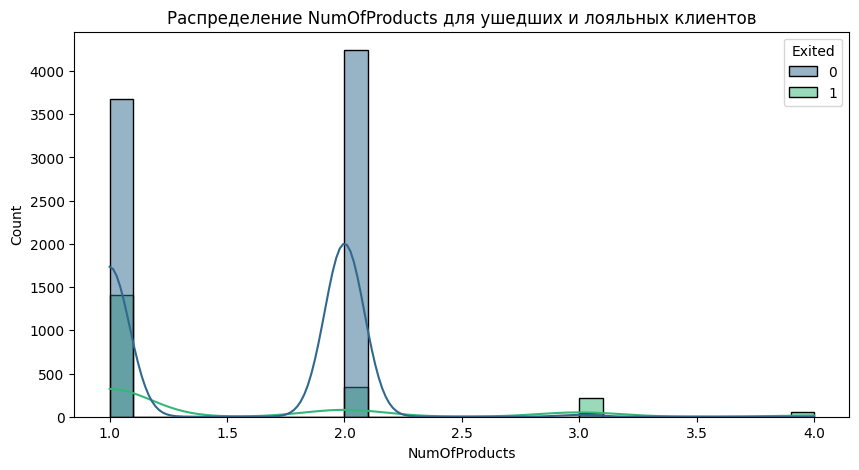

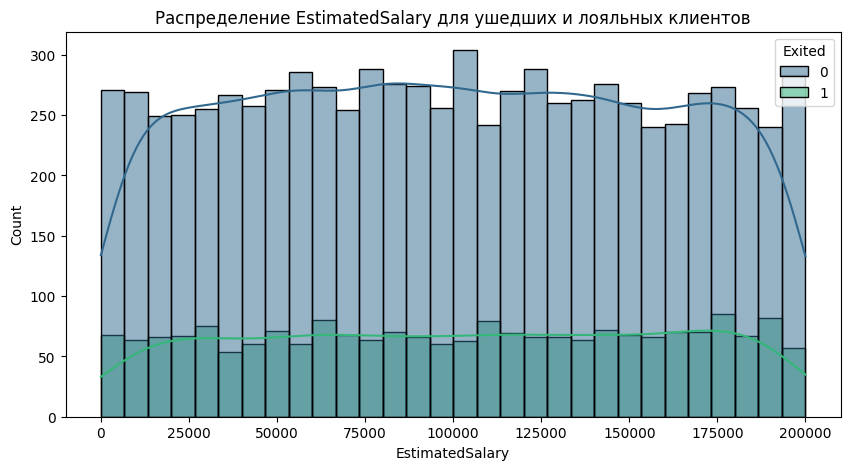

In [55]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=churn_data, x=col, hue='Exited', kde=True, bins=30, palette='viridis')
    plt.title(f'Распределение {col} для ушедших и лояльных клиентов')
    plt.show()

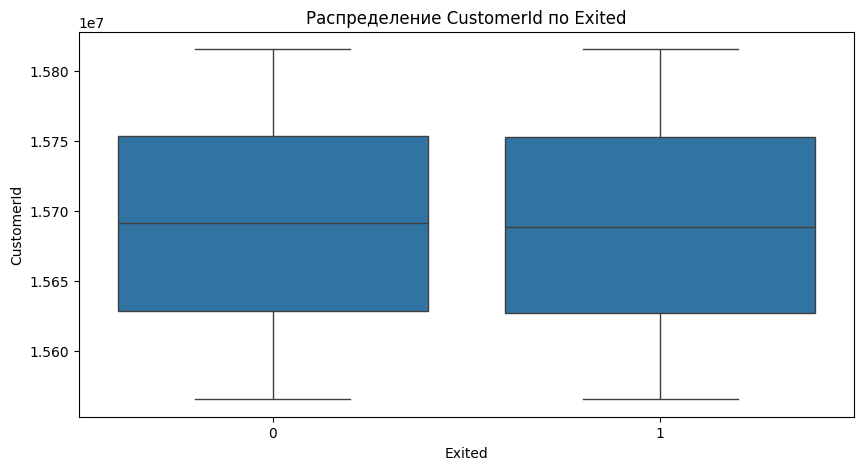

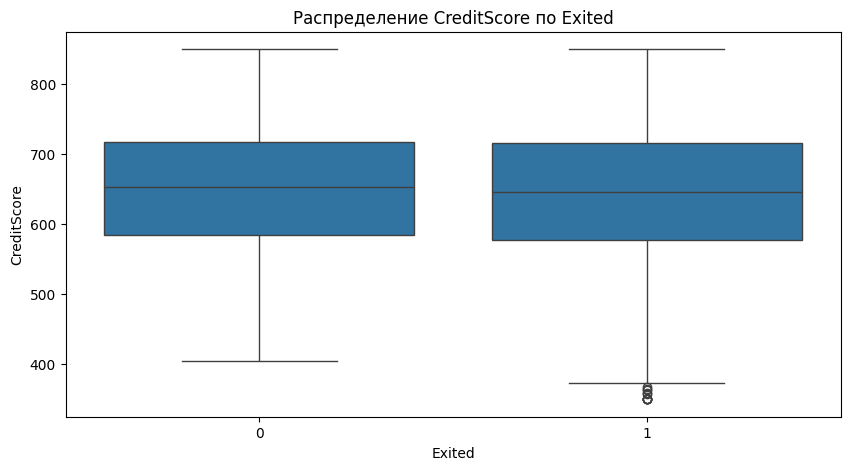

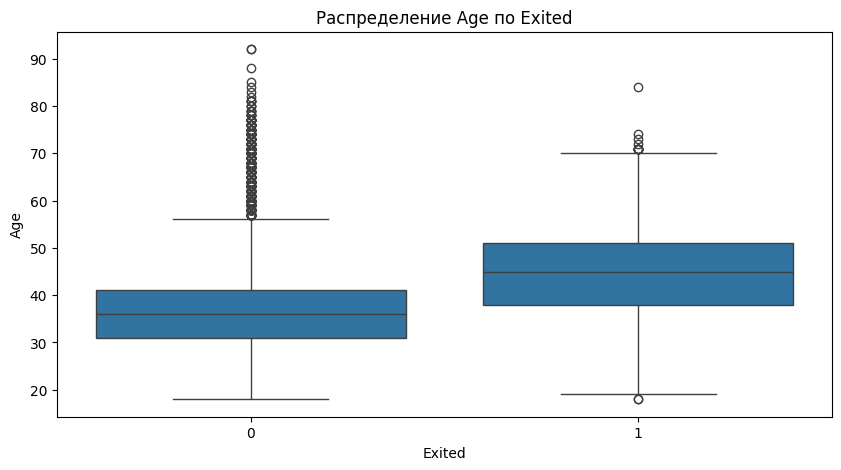

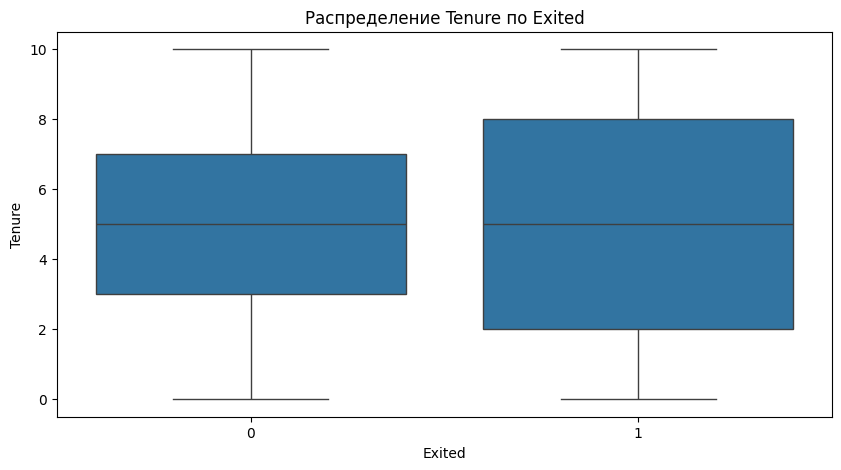

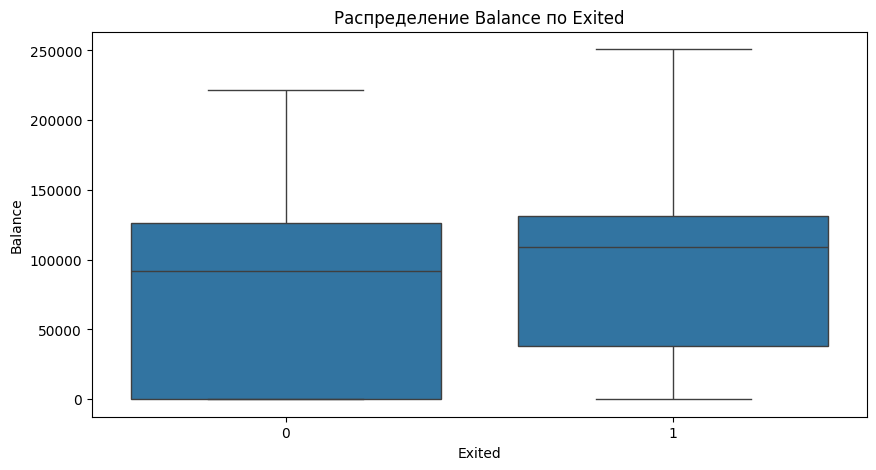

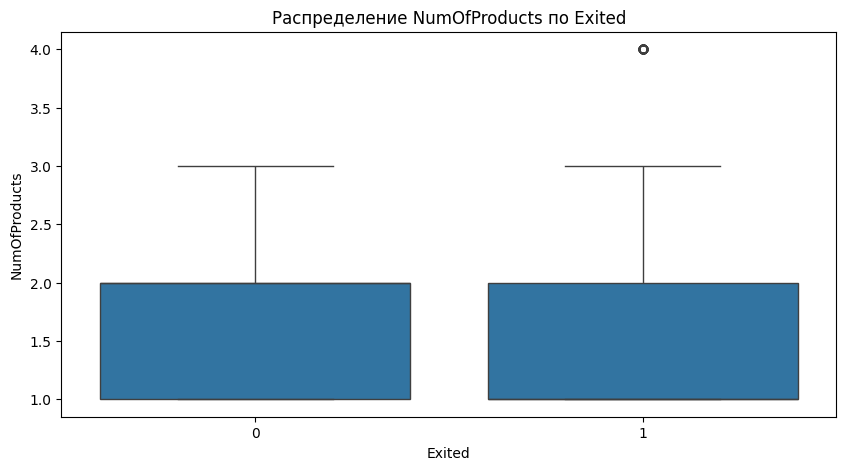

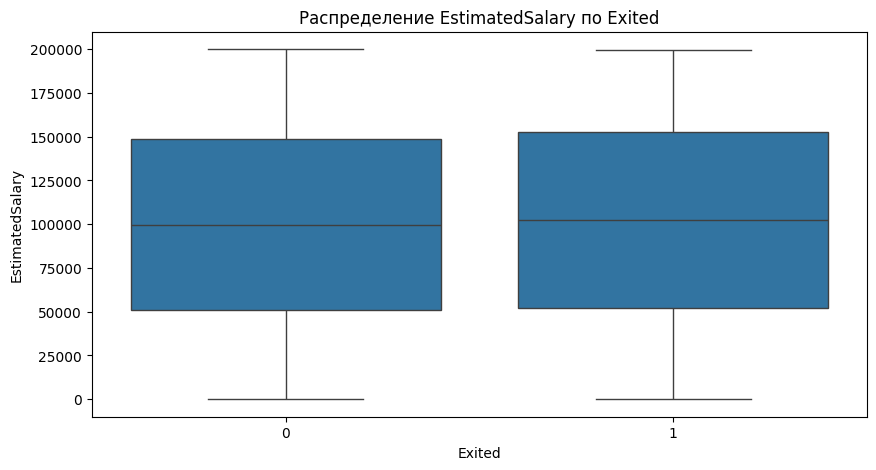

In [56]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Exited', y=col, data=churn_data)
    plt.title(f'Распределение {col} по Exited')
    plt.show()

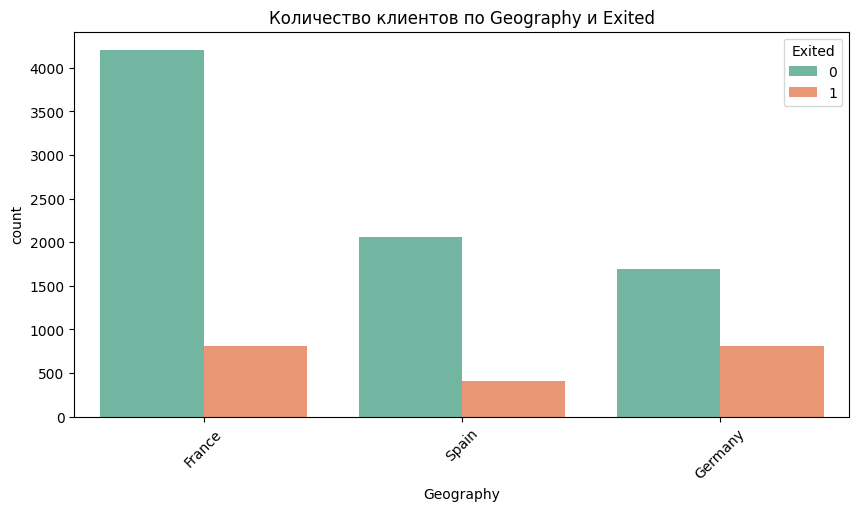

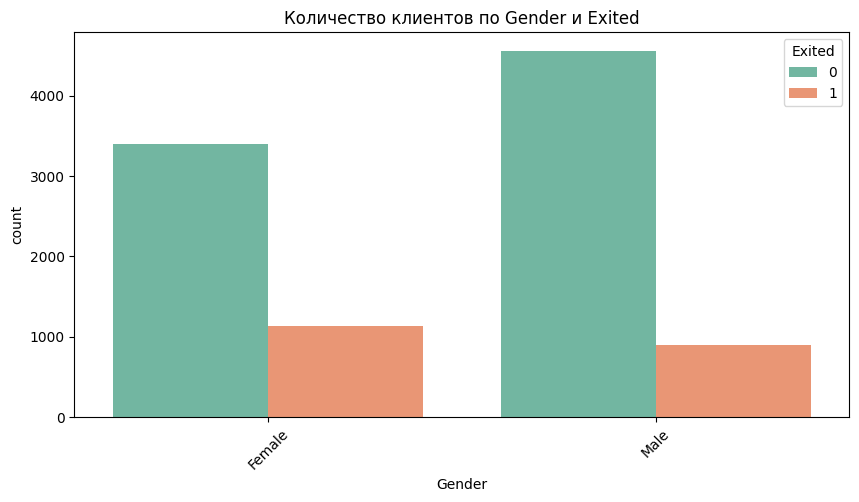

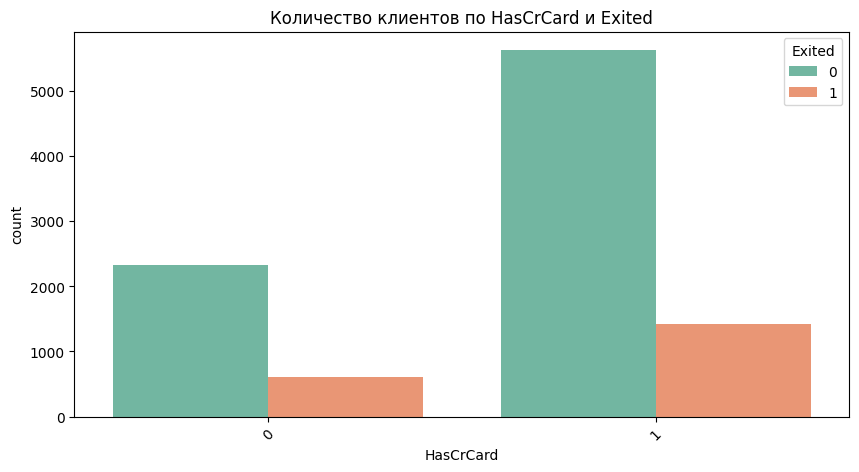

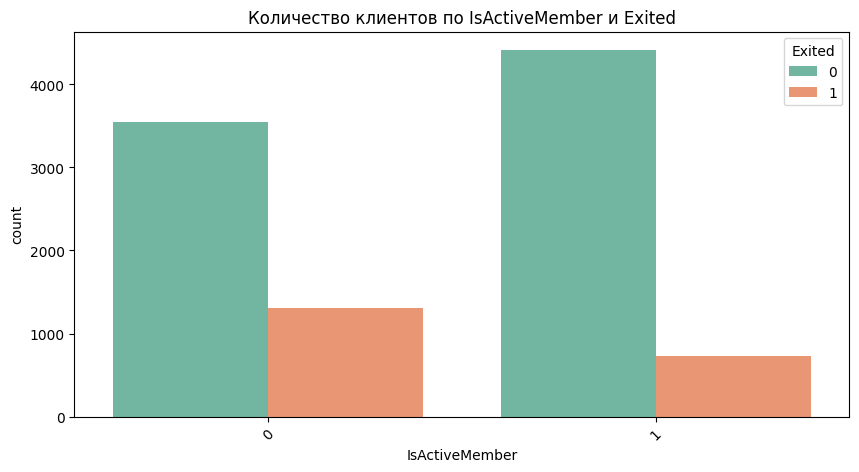

In [57]:
for col in cat_cols[1:]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='Exited', data=churn_data, palette='Set2')
    plt.title(f'Количество клиентов по {col} и Exited')
    plt.xticks(rotation=45)
    plt.show()

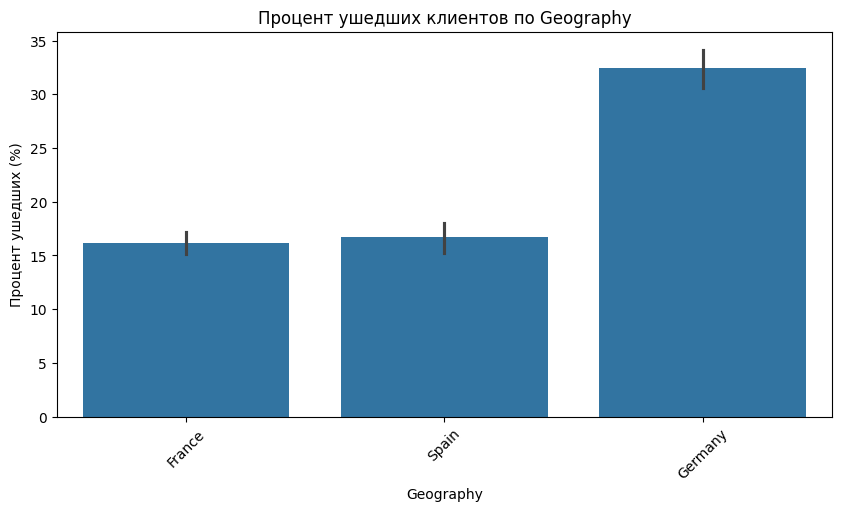

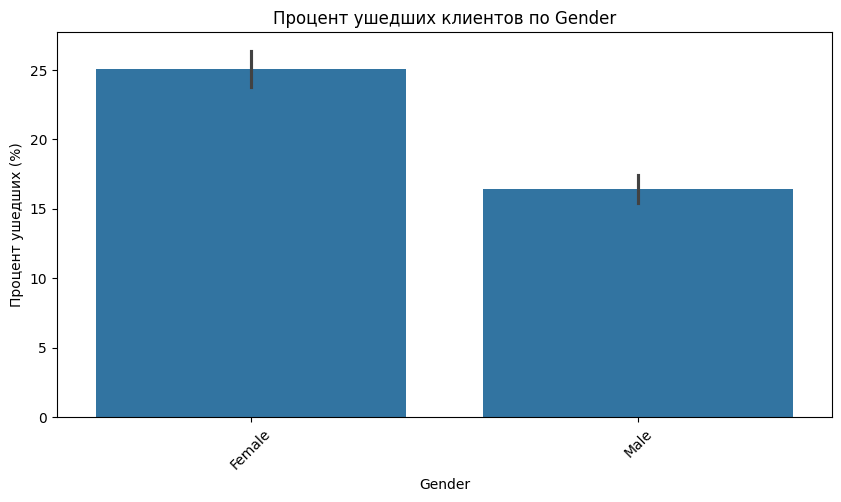

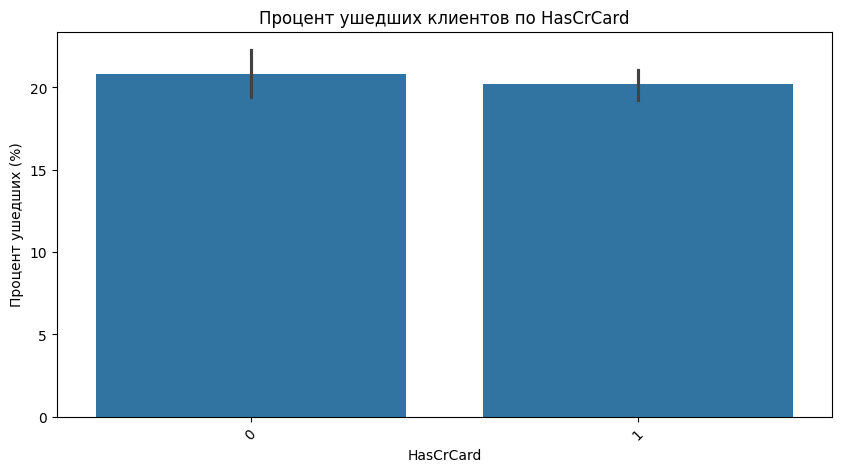

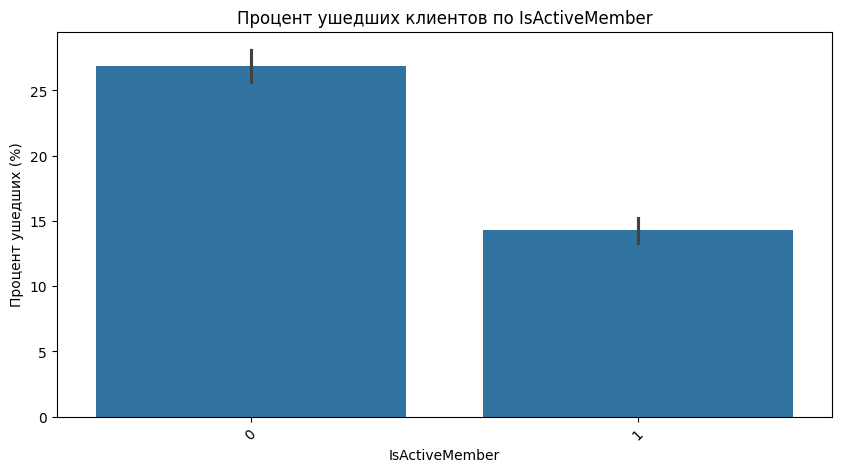

In [59]:
for col in cat_cols[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y='Exited', data=churn_data, estimator=lambda x: sum(x) / len(x) * 100)
    plt.title(f'Процент ушедших клиентов по {col}')
    plt.ylabel('Процент ушедших (%)')
    plt.xticks(rotation=45)
    plt.show()

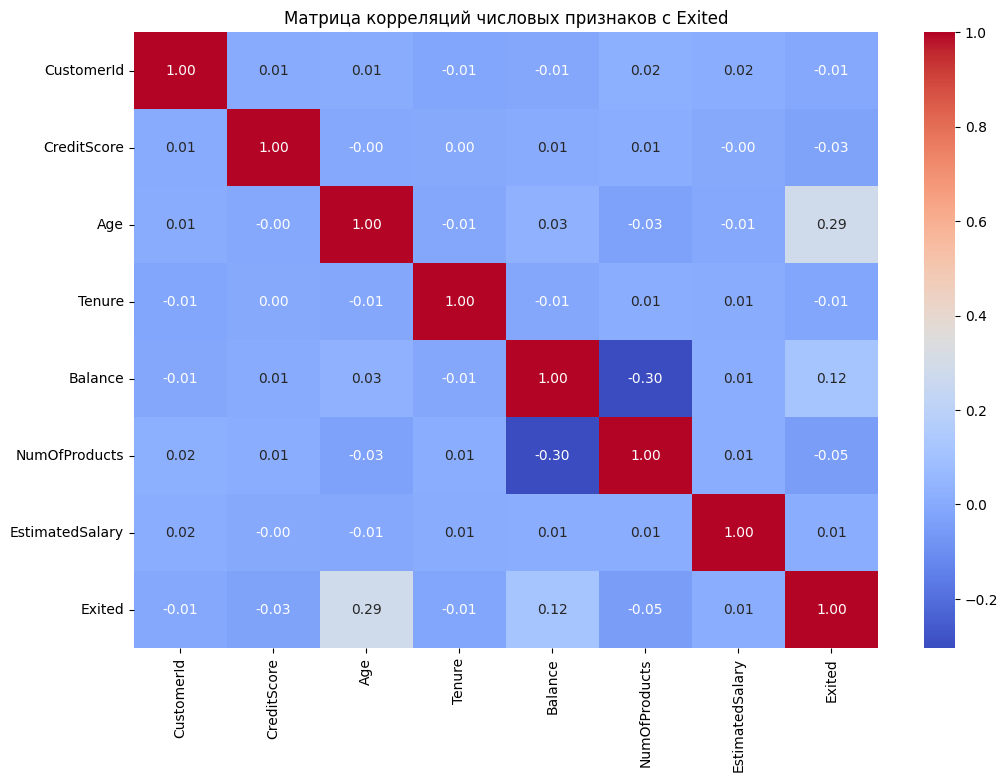

In [60]:
plt.figure(figsize=(12, 8))
corr = churn_data[numeric_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций числовых признаков с Exited')
plt.show()

Исследователи, которые уже работали с этим датасетом, пришли к выводу, что наилучшее решение при работе с этими данными — строить модели индивидуально для каждой страны. Мы будем прогнозировать отток в немецком филиале банка.

In [63]:
churn_data = churn_data[churn_data['Geography'] == 'Germany']
churn_data.shape

(2509, 13)

In [65]:
churn_data = churn_data.drop(['Geography', 'CustomerId', 'Surname'], axis=1)
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,Female,29,4,115046.74,4,1,0,119346.88,1
15,616,Male,45,3,143129.41,2,0,1,64327.26,0
16,653,Male,58,1,132602.88,1,1,0,5097.67,1
26,756,Male,36,2,136815.64,1,1,1,170041.95,0
28,574,Female,43,3,141349.43,1,1,1,100187.43,0


### Создание признаков

* `BalanceSalaryRatio` — отношение баланса на счетах к заработной плате клиента;
* `TenureByAge` — отношение времени пользования услугами банка к возрасту клиента;
* `CreditScoreGivenAge` — отношение кредитного рейтинга к возрасту клиента.

In [71]:
churn_data['BalanceSalaryRatio'] = churn_data['Balance'] / churn_data['EstimatedSalary']
churn_data['TenureByAge'] = churn_data['Tenure'] / churn_data['Age']
churn_data['CreditScoreGivenAge'] = churn_data['CreditScore'] / churn_data['Age']
churn_data['Gender'] = churn_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [75]:
print(churn_data.describe().round(2))

       CreditScore   Gender      Age   Tenure    Balance  NumOfProducts  \
count      2509.00  2509.00  2509.00  2509.00    2509.00        2509.00   
mean        651.45     0.52    39.77     5.01  119730.12           1.52   
std          98.17     0.50    10.52     2.94   27022.01           0.62   
min         350.00     0.00    18.00     0.00   27288.43           1.00   
25%         584.00     0.00    32.00     2.00  102800.72           1.00   
50%         651.00     1.00    38.00     5.00  119703.10           1.00   
75%         722.00     1.00    45.00     8.00  137560.38           2.00   
max         850.00     1.00    84.00    10.00  214346.96           4.00   

       HasCrCard  IsActiveMember  EstimatedSalary   Exited  \
count    2509.00          2509.0          2509.00  2509.00   
mean        0.71             0.5        101113.44     0.32   
std         0.45             0.5         58263.01     0.47   
min         0.00             0.0            11.58     0.00   
25%         0.